In [190]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

In [3]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear(lstm_out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out

In [4]:
SEQ_LEN = 128
INPUT_SIZE = 1
#HIDDEN_SIZE = 32 - for more complex case of multi_dist=True
HIDDEN_SIZE = 4

# InDiD

In [5]:
base_model_cpd = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

cpd_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='CPD', experiment_type='synthetic_1D', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [6]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [7]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 7777

In [8]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | CPDLoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 1.833


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.052 >= min_delta = 0.01. New best score: 1.781


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.056 >= min_delta = 0.01. New best score: 1.724


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.062 >= min_delta = 0.01. New best score: 1.662


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.071 >= min_delta = 0.01. New best score: 1.591


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.081 >= min_delta = 0.01. New best score: 1.510


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.088 >= min_delta = 0.01. New best score: 1.422


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.088 >= min_delta = 0.01. New best score: 1.334


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.087 >= min_delta = 0.01. New best score: 1.247


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.082 >= min_delta = 0.01. New best score: 1.165


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.078 >= min_delta = 0.01. New best score: 1.087


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.072 >= min_delta = 0.01. New best score: 1.015


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.068 >= min_delta = 0.01. New best score: 0.948


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.063 >= min_delta = 0.01. New best score: 0.885


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.061 >= min_delta = 0.01. New best score: 0.824


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.060 >= min_delta = 0.01. New best score: 0.764


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.062 >= min_delta = 0.01. New best score: 0.703


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.063 >= min_delta = 0.01. New best score: 0.640


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.067 >= min_delta = 0.01. New best score: 0.572


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.073 >= min_delta = 0.01. New best score: 0.499


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.081 >= min_delta = 0.01. New best score: 0.418


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.091 >= min_delta = 0.01. New best score: 0.326


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.103 >= min_delta = 0.01. New best score: 0.224


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.117 >= min_delta = 0.01. New best score: 0.106


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.132 >= min_delta = 0.01. New best score: -0.026


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.145 >= min_delta = 0.01. New best score: -0.171


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.158 >= min_delta = 0.01. New best score: -0.328


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.157 >= min_delta = 0.01. New best score: -0.486


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.165 >= min_delta = 0.01. New best score: -0.650


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.171 >= min_delta = 0.01. New best score: -0.822


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.182 >= min_delta = 0.01. New best score: -1.003


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.197 >= min_delta = 0.01. New best score: -1.200


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.187 >= min_delta = 0.01. New best score: -1.387


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.214 >= min_delta = 0.01. New best score: -1.601


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.185 >= min_delta = 0.01. New best score: -1.786


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.172 >= min_delta = 0.01. New best score: -1.959


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.152 >= min_delta = 0.01. New best score: -2.110


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.187 >= min_delta = 0.01. New best score: -2.298


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: -2.313


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.340 >= min_delta = 0.01. New best score: -2.653


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.203 >= min_delta = 0.01. New best score: -2.856


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.177 >= min_delta = 0.01. New best score: -3.033


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.208 >= min_delta = 0.01. New best score: -3.241


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.185 >= min_delta = 0.01. New best score: -3.426


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.286 >= min_delta = 0.01. New best score: -3.712


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.233 >= min_delta = 0.01. New best score: -3.945


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.242 >= min_delta = 0.01. New best score: -4.187


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.232 >= min_delta = 0.01. New best score: -4.420


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.261 >= min_delta = 0.01. New best score: -4.681


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.265 >= min_delta = 0.01. New best score: -4.946


# BCE_seq2seq model

In [9]:
base_model_bce = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

bce_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='BCE', experiment_type='synthetic_1D', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [10]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [11]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.282


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.260


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.241


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.227


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.207


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.192


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.173


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.161


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.146


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.136


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.124


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.114


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.114. Signaling Trainer to stop.


# Combined approach

In [12]:
base_model_comb = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                       n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='synthetic_1D', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=32,
                                    loss_type='CPD', experiment_type='synthetic_1D', 
                                    lr=0.001, batch_size=64)

In [13]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer_1 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [14]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.639


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.625


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.606


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.591


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.021 >= min_delta = 0.01. New best score: 0.570


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.548


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.528


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.509


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.490


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.470


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.451


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.431


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.411


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.390


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.370


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.352


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.333


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.01. New best score: 0.315


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.295


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.034 >= min_delta = 0.01. New best score: 0.261


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.01. New best score: 0.235


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.220


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.209
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 117   
1 | loss  | CPDLoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.160 >= min_delta = 0.01. New best score: 0.049


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.318 >= min_delta = 0.01. New best score: -0.269


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.350 >= min_delta = 0.01. New best score: -0.619


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.397 >= min_delta = 0.01. New best score: -1.015


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.409 >= min_delta = 0.01. New best score: -1.425


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.434 >= min_delta = 0.01. New best score: -1.858


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.508 >= min_delta = 0.01. New best score: -2.367


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.593 >= min_delta = 0.01. New best score: -2.959


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.686 >= min_delta = 0.01. New best score: -3.645


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.775 >= min_delta = 0.01. New best score: -4.420


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.870 >= min_delta = 0.01. New best score: -5.290


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.965 >= min_delta = 0.01. New best score: -6.255


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.076 >= min_delta = 0.01. New best score: -7.331


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.197 >= min_delta = 0.01. New best score: -8.528


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.319 >= min_delta = 0.01. New best score: -9.847


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.437 >= min_delta = 0.01. New best score: -11.285


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.544 >= min_delta = 0.01. New best score: -12.828


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.635 >= min_delta = 0.01. New best score: -14.464


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.715 >= min_delta = 0.01. New best score: -16.178


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.783 >= min_delta = 0.01. New best score: -17.961


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.833 >= min_delta = 0.01. New best score: -19.794


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.887 >= min_delta = 0.01. New best score: -21.681


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.923 >= min_delta = 0.01. New best score: -23.604


# Baselines

In [232]:
l2_model = models.L2Baseline(l2_type="one_by_one", device='cuda')   
zero_model = models.ZeroBaseline(device='cuda')    

# parameter pen is selected by gridsearch
#binseg_model_1 = models.ClassicBaseline(rpt.Binseg(), n_pred=None, pen=11.3)
binseg_model = models.ClassicBaseline(rpt.Binseg(), n_pred=1, pen=None)
pelt_model = models.ClassicBaseline(rpt.Pelt(), pen=30.1)
#kernel_model = models.ClassicBaseline(rpt.KernelCPD('rbf'), n_pred=None, pen=3.5446)
kernel_model = models.ClassicBaseline(rpt.KernelCPD("rbf"), n_pred=1)


# Calculate metrics

In [177]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

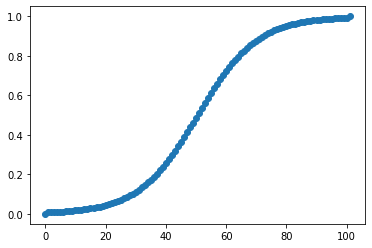

In [178]:
plt.plot(threshold_list, 'o')

In [18]:
_, delay_list_cpd, fp_delay_list_cpd = metrics.evaluation_pipeline(cpd_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

/home/eromanenkova/PrincipledCPD/CPD/new_metrics.py:421: RuntimeWarning: invalid value encountered in double_scalars
  macro_f1_score = 2.0 * macro_precisions * macro_recall / (macro_precisions + macro_recall)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AUC: 512.4184
Time to FA 98.08, delay detection 0.6433 for best-cover threshold: 0.5126
TP 141, TN 155, FP 0, FN 4 for best-cover threshold: 0.5126
Max COVER 0.9934: for threshold 0.5126
Max F1 0.9895: for threshold 0.4874
F1 0.986: for best-cover threshold 0.5126
Max F1_ruptures (M=5) 0.9859: for threshold 0.2976
F1 0.9645: for best-cover threshold 0.5126


In [19]:
_, delay_list_bce, fp_delay_list_bce = metrics.evaluation_pipeline(bce_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 512.4184
Time to FA 98.08, delay detection 0.6433 for best-cover threshold: 0.5126
TP 141, TN 155, FP 0, FN 4 for best-cover threshold: 0.5126
Max COVER 0.9934: for threshold 0.5126
Max F1 0.9895: for threshold 0.4874
F1 0.986: for best-cover threshold 0.5126
Max F1_ruptures (M=5) 0.9859: for threshold 0.2976
F1 0.9645: for best-cover threshold 0.5126


In [20]:
_, delay_list_comb, fp_delay_list_comb = metrics.evaluation_pipeline(combined_model_2, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 519.5505
Time to FA 98.76, delay detection 1.63 for best-cover threshold: 0.2572
TP 139, TN 155, FP 0, FN 6 for best-cover threshold: 0.2572
Max COVER 0.9829: for threshold 0.2572
Max F1 0.9789: for threshold 0.2572
F1 0.9789: for best-cover threshold 0.2572
Max F1_ruptures (M=5) 0.9783: for threshold 0.3192
F1 0.9712: for best-cover threshold 0.2572


In [48]:
_, delay_list_l2, fp_delay_list_l2 = metrics.evaluation_pipeline(l2_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 980.5055
Time to FA 64.1633, delay detection 0.3333 for best-cover threshold: 0.9851
TP 141, TN 0, FP 159, FN 0 for best-cover threshold: 0.9851
Max COVER 0.7337: for threshold 0.9851
Max F1 0.6395: for threshold 0.7616
F1 0.6395: for best-cover threshold 0.9851
Max F1_ruptures (M=5) 0.9655: for threshold 0.7616
F1_ruptures 0.9655: for best-cover threshold 0.9851


In [50]:
_, delay_list_zero, fp_delay_list_zero = metrics.evaluation_pipeline(zero_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 128.0, delay detection 30.2667 for best-cover threshold: 0.5
TP 0, TN 155, FP 0, FN 145 for best-cover threshold: 0.5
Max COVER 0.7635: for threshold 0.5
Max F1 0.0: for threshold 0.5
F1 0.0: for best-cover threshold 0.5
Max F1_ruptures (M=5) nan: for threshold 0.5
F1_ruptures nan: for best-cover threshold 0.5


/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [233]:
_, delay_list_binseg, fp_delay_list_binseg = metrics.evaluation_pipeline(binseg_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 66.2, delay detection 0.4 for best-cover threshold: 0.5
TP 88, TN 0, FP 212, FN 0 for best-cover threshold: 0.5
Max COVER 0.7475: for threshold 0.5
Max F1 0.4536: for threshold 0.5
F1 0.4536: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.9793: for threshold 0.5
F1_ruptures 0.9793: for best-cover threshold 0.5


In [237]:
_, delay_list_pelt, fp_delay_list_pelt = metrics.evaluation_pipeline(pelt_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 97.48, delay detection 0.58 for best-cover threshold: 0.5
TP 43, TN 155, FP 98, FN 4 for best-cover threshold: 0.5
Max COVER 0.9836: for threshold 0.5
Max F1 0.4574: for threshold 0.5
F1 0.4574: for best-cover threshold 0.5
Max F1_ruptures (M=5) 1.0: for threshold 0.5
F1_ruptures 1.0: for best-cover threshold 0.5


In [238]:
_, delay_list_kernel, fp_delay_list_kernel = metrics.evaluation_pipeline(kernel_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 64.7333, delay detection 0.5133 for best-cover threshold: 0.5
TP 142, TN 0, FP 158, FN 0 for best-cover threshold: 0.5
Max COVER 0.7426: for threshold 0.5
Max F1 0.6425: for threshold 0.5
F1 0.6425: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.9655: for threshold 0.5
F1_ruptures 0.9655: for best-cover threshold 0.5


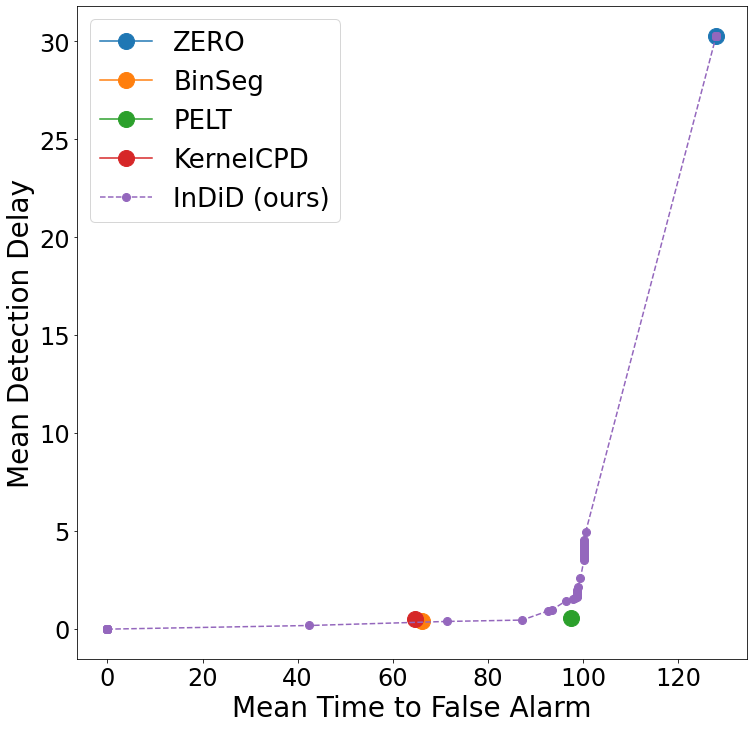

In [244]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_zero, delay_list_zero, '-o', markersize=16, label='ZERO')
#plt.plot(fp_delay_list_l2, delay_list_l2, '--o', markersize=8, label='L2')
plt.plot(fp_delay_list_binseg, delay_list_binseg, '-o', markersize=16, label='BinSeg')
plt.plot(fp_delay_list_pelt, delay_list_pelt, '-o', markersize=16, label='PELT')
plt.plot(fp_delay_list_kernel, delay_list_kernel, '-o', markersize=16, label='KernelCPD')
#plt.plot(fp_delay_list_cpd, delay_list_cpd, '-o', markersize=8, label='CPD (ours)')
#plt.plot(fp_delay_list_bce, delay_list_bce, '--o', markersize=8, label='BCE')
plt.plot(fp_delay_list_comb, delay_list_comb, '--o', markersize=8, label='InDiD (ours)')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);